In [1]:
from prediction.model import *

# Simple ABM for Prediction Markets

Each agent in the population has a personal probability $p_i$ of some event happening ('i.e. how likely is it to rain next Monday?'). In the prediction market, the agent can buy or sell "shares" of whether they think an event is going to happen, based on this personal probability. 

On the expiration date of the event (let's say next Monday), if the event is true, the shares are worth 1 dollar, and if the event is false, the shares are worth 0 dollars. If the agents believe themselves to be well-calibrated and are acting rationally, they will buy shares when the price is less than their personal probability $p_i$, and sell shares when the price is above $p_i$. 

This constrains the price of these shares to be between 0 and 1. It is interesting to see how the equilibrium market price of the shares should track the actual average of the population's belief, if at all, and how this might depend on the shape of the probability distribution for the population. 

In [2]:
# Simulate n_agents, and has them step through n_steps turns
# Each agents gets to place one bid and one ask every turn
# The order in which they trade is random, but each one gets to go once before it loops back around

n_steps = 200
n_agents = 500
model = PredictionMarketModel(n_agents)
for i in range(n_steps):
    model.step()

creating 500 agents..
running model...


In [3]:
# at every iteration save the highest bid price, lowest ask price, 
# and how many trades were done that turn
df = model.datacollector.get_model_vars_dataframe()
df.tail(20)

,bid_price,ask_price,volume
180,0.65,0.66,298
181,0.66,0.66,201
182,0.65,0.65,295
183,0.66,0.66,205
184,0.65,0.66,288
185,0.66,0.66,210
186,0.65,0.66,293
187,0.66,0.66,206
188,0.65,0.66,296
189,0.66,0.66,203


Plot of bids/asks for the population at the end of the simulation

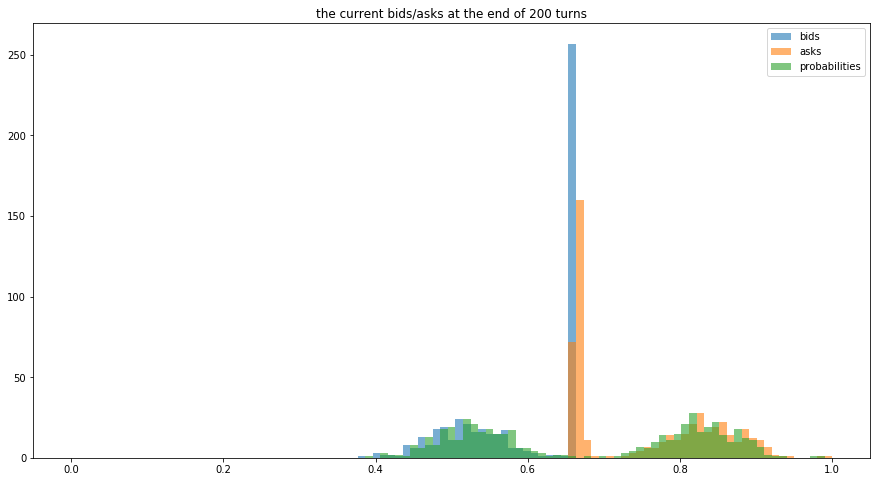

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
agent_bids = [a.bid for a in model.schedule.agents]
agent_asks = [a.ask for a in model.schedule.agents]
agent_probs = [a.prob for a in model.schedule.agents]
plt.figure(figsize=(15,8))
plt.hist(agent_bids, bins=101, range=(0,1),alpha=0.6)
plt.hist(agent_asks, bins=101, range=(0,1),alpha=0.6)
plt.hist(agent_probs, bins=101, range=(0,1),alpha=0.6)
plt.title('the current bids/asks at the end of {} turns'.format(n_steps))
plt.legend(['bids','asks','probabilities'])
plt.show()

The probability disitrubtion of the population probabilities is bimodal. Even so, the bid/ask spread still finds the mean of the distribution.

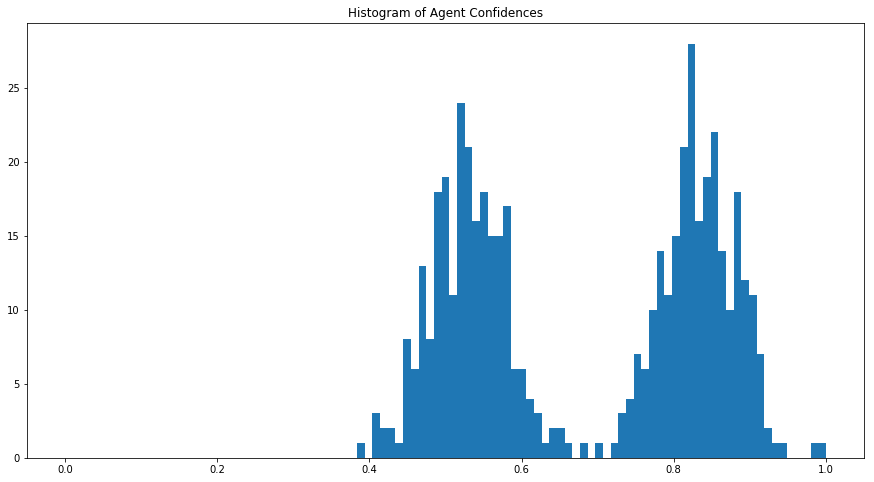

In [5]:
plt.figure(figsize=(15,8))
plt.hist(agent_probs, bins=99,range=(0,1))
plt.title('Histogram of Agent Confidences')
plt.show()

The agents all begin with their bids at 0 dollars, and their asks at 1 dollar.

The agents are only allowed to change their bid/ask price by 1 cent every turn.

A better update would make this more stochastic.

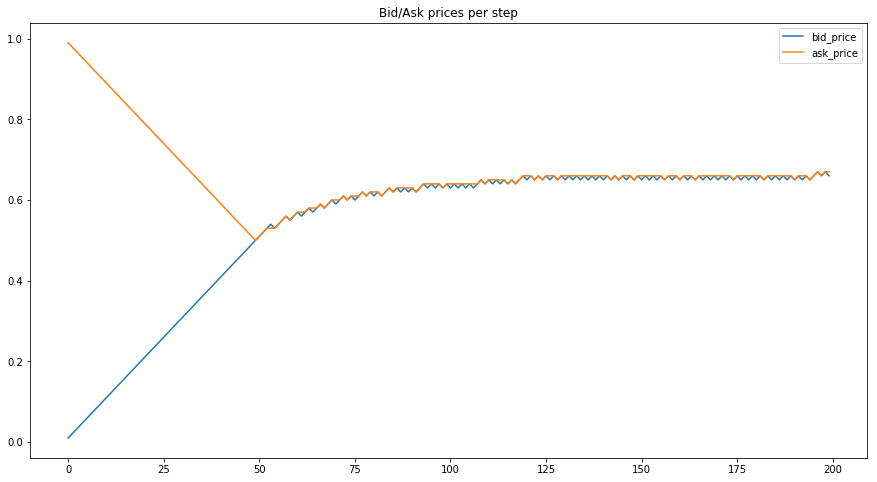

In [6]:
plt.figure(figsize=(15,8))
plt.plot(df['bid_price'])
plt.plot(df['ask_price'])
plt.title('Bid/Ask prices per step')
plt.legend(['bid_price','ask_price'])
plt.show()

In [7]:
print('mean probability of the agent population: {}'.format(round(np.mean(agent_probs),2)))
print('ask price: {}'.format(round(df['ask_price'].values[-1],2)))
print('bid price: {}'.format(round(df['bid_price'].values[-1],2)))

mean probability of the agent population: 0.68
ask price: 0.67
bid price: 0.66
